#**Assessment Task 3 (40 marks)**

##Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A3_1234.ipynb.

4.  Insert your student ID and name in the following cell.

## Background

Environment and its changes are the most complex system. It is unarguably accepted that the temperature changes are greately affected by various environmental factors. Many of them are positively related to the  change, whereas, some have negative correlation. In this assesment task, you will analyse relationship among various environmental factors, which affect temperature.

##The dataset

**Dataset file name:** weather_dataset.csv

**Dataset description:** The dataset contains total 10 features. Each row contains an hourly record of weather status and the data was recorded for the time period between 2006 and 2016.

**Features and labels:** 

1.   recording_date_time (date_time): Date and time the data was recorded
2.   precip_type (string): Precipitation status, blank (no value) indicates unknown status
3.   temperature (float): Temperature in degree Celsius
4.   apparent_temperature (float): Feel like temperature in degree Celsius
5.   humidity (float): Percentage amount of water vapour in the air 
6.   wind_speed (float): Speed of the wind in km per hour
7.   wind_bearing (int): The direction of wind in degree in geo-polar co-ordinate. Value 0 means perfect east, 90 means perfect north, 180 and 270 means west and south respectively.
8.   visibility (float): Distance in km that is visible in naked eyes.
9.   cloud_cover (float): The fraction of the sky obscured by clouds. The value is 1 if the observed area is fully cloudy, 0 if no clouds and other fractional value indicates the portion of the area covered by clouds.
10.   pressure (float): Air pressure or atmospheric in milibars


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore')
original_data=pd.read_csv('weather_dataset.csv')
data=original_data.copy()

##**Part 1: Linear Regression:**  **(25 marks)**


1.   Load the dataset and split the data for training and testing - consider the data of last 2 years (2015 and 2016) for testing. Now exclude recording_date_time column from both training and test sets. Display the shape of training and test sets. **(3 marks)**

In [2]:
data['recording_date_time']=pd.to_datetime(data['recording_date_time'])
split_date = pd.datetime(2015,1,1)
data_training_dummy,data_test_dummy = data.loc[data['recording_date_time'] < split_date],data.loc[data['recording_date_time'] >= split_date]
data_training,data_test=data_training_dummy.drop(['recording_date_time'],axis=1),data_test_dummy.drop(['recording_date_time'],axis=1)
print("Training Data Shape",data_training.shape)
print("Test Data Shape",data_test.shape)

Training Data Shape (78910, 9)
Test Data Shape (17543, 9)


2.  Consider the 'temperature' as the target. List the insignificant features for predicting temperature, if any. Explain your findings. **(5 marks)**
<br/><font color='green'>**[Hint for students: See the "7.3 Relevance and Covariance among features or variables" for more information.]** <font/>

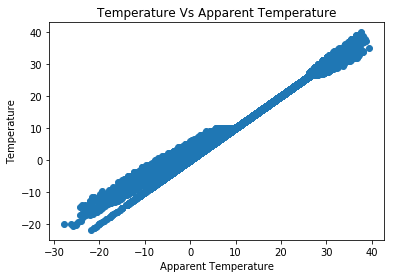

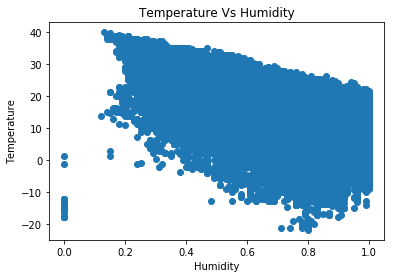

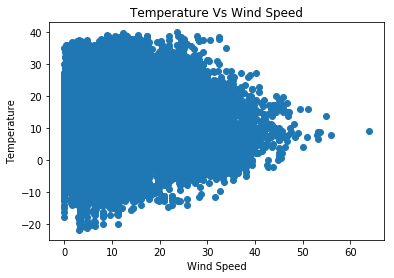

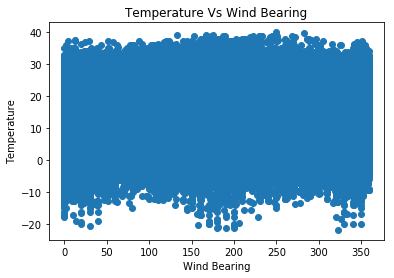

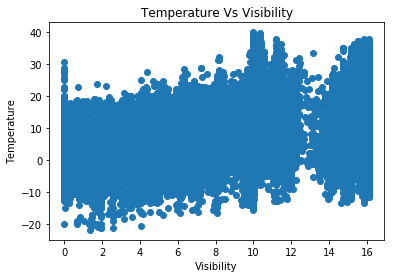

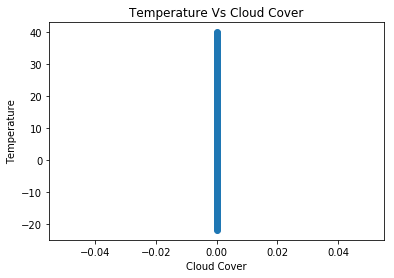

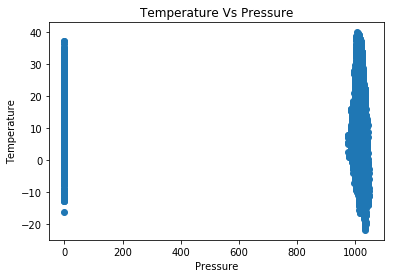

In [3]:
y=data["temperature"]
x1=data["apparent_temperature"]
x2=data["humidity"]
x3=data["wind_speed"]
x4=data["wind_bearing"]
x5=data["visibility"]
x6=data["cloud_cover"]
x7=data["pressure"]
x1.corr(y),x2.corr(y),x3.corr(y),x4.corr(y),x5.corr(y),x6.corr(y),x7.corr(y)

#Scatter plots for all independent variables with Temperature
plt.figure(1)
plt.plot(x1,y,"o")
plt.xlabel('Apparent Temperature')
plt.ylabel('Temperature')
plt.title('Temperature Vs Apparent Temperature')
plt.figure(2)
plt.plot(x2,y,"o")
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Temperature Vs Humidity')
plt.figure(3)
plt.plot(x3,y,"o")
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.title('Temperature Vs Wind Speed')
plt.figure(4)
plt.plot(x4,y,"o")
plt.xlabel('Wind Bearing')
plt.ylabel('Temperature')
plt.title('Temperature Vs Wind Bearing')
plt.figure(5)
plt.plot(x5,y,"o")
plt.xlabel('Visibility')
plt.ylabel('Temperature')
plt.title('Temperature Vs Visibility')
plt.figure(6)
plt.plot(x6,y,"o")
plt.xlabel('Cloud Cover')
plt.ylabel('Temperature')
plt.title('Temperature Vs Cloud Cover')
plt.figure(7)
plt.plot(x7,y,"o")
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.title('Temperature Vs Pressure')
plt.show()


In [4]:
#From above scatter plots we can see features and their relation with Temperature 
#Printing list of significant and insignificant feature set
print("Insignificant features for predicting Temperature are:")
print("Wind Speed Correlation: ",x3.corr(y), " No relation")
print("Wind Bearing :",x4.corr(y)," No relation")
print("Cloud cover: ",x6.corr(y),"No relation")
print("Pressure: ",x7.corr(y)," No relation")

print("Significant features for predicting Temperature are:")
print("Temperature Corelation with Apperent Temperature",x1.corr(y)," Strong Positive")
print("Temperature Corelation with Apperent Humidity",x2.corr(y)," Moderate Negative")
print("Temperature Corelation with Apperent Visibility",x5.corr(y)," Weak Positive")

Insignificant features for predicting Temperature are:
Wind Speed Correlation:  0.008957366784580997  No relation
Wind Bearing : 0.029987780986918917  No relation
Cloud cover:  nan No relation
Pressure:  -0.00544738779361055  No relation
Significant features for predicting Temperature are:
Temperature Corelation with Apperent Temperature 0.9926283802149835  Strong Positive
Temperature Corelation with Apperent Humidity -0.6322527136083688  Moderate Negative
Temperature Corelation with Apperent Visibility 0.3927811856835805  Weak Positive


3.  Now create a linear model considering the 'temperature' as the target variable and other columns as features (you can optionally remove non-contributing features). Show the test performance (as Mean Absolute Error, MAE) of the model. **(5 marks)**

In [5]:
#Keeping Apparent Temperature which is strong positive, Humidity and Visibility which have high or some correlation with dependent variable temperature
#Creating training and test set 

feature_cols_train=['apparent_temperature','humidity','visibility']
X_train=data_training[feature_cols_train].values
Y_train=data_training.temperature.values

#Creaating test set

feature_cols_test=['apparent_temperature','humidity','visibility']
X_test=data_test[feature_cols_test].values
Y_test=data_test.temperature.values



print(Y_train.shape)
print(X_train.shape)


(78910,)
(78910, 3)


In [6]:
#Fitting Model
my_model = LinearRegression(normalize=True)
my_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [7]:
ypredicts = my_model.predict(X_test)
print("The predicted Temperature:")
print(ypredicts)
print("The true Values:")
print(Y_test)
#Calculating Mean absolute error
print("Mean absolute Error is : ",mean_absolute_error(Y_test, ypredicts))

The predicted Temperature:
[12.12952284 12.33871571  8.97602321 ... 22.06367089 21.51462973
 20.55315639]
The true Values:
[11.02 10.99  9.87 ... 22.04 21.52 20.44]
Mean absolute Error is :  0.76188374419927


4.   Find the feature which shows maximum correlation with "pressure". Create a linear regression model to predict temperature using these two features ('pressure' and the one which shows maximum correlation). Compare the performance of this simplified model with the model developed in the previous question (Q-3). Explain the performance variation, if any. **(6 marks)**

In [8]:
#Assigning indepndent and dependent variables, dependent variable Y is pressure and rest are all independent variables
y_pressure=data["pressure"]
x1_pressure=data["temperature"]
x2_pressure=data["apparent_temperature"]
x3_pressure=data["humidity"]
x4_pressure=data["wind_speed"]
x5_pressure=data["wind_bearing"]
x6_pressure=data["visibility"]
x7_pressure=data["cloud_cover"]

print("Correlation with Temperature",x1_pressure.corr(y_pressure))
print("Correlation with Apparent Temperature",x2_pressure.corr(y_pressure))
print("Correlation with Humidity",x3_pressure.corr(y_pressure))
print("Correlation with Wind Speed",x4_pressure.corr(y_pressure))
print("Correlation with Wind Bearing",x5_pressure.corr(y_pressure))
print("Correlation with Visibility",x6_pressure.corr(y_pressure))
print("Correlation with Cloud Cover",x7_pressure.corr(y_pressure))


Correlation with Temperature -0.00544738779361055
Correlation with Apparent Temperature -0.00021828571839218767
Correlation with Humidity 0.005454263261941814
Correlation with Wind Speed -0.04926022700676481
Correlation with Wind Bearing -0.011650884797118888
Correlation with Visibility 0.05982620828433797
Correlation with Cloud Cover nan


In [9]:
max_corr_neg=max(x1_pressure.corr(y_pressure),x2_pressure.corr(y_pressure),x4_pressure.corr(y_pressure),x5_pressure.corr(y_pressure))
max_corr_pos=max(x3_pressure.corr(y_pressure),x6_pressure.corr(y_pressure))
print("Maximum Positive correlation with pressure ",max_corr_pos)
print("Maximum Negative correlation with pressure ",max_corr_neg)


Maximum Positive correlation with pressure  0.05982620828433797
Maximum Negative correlation with pressure  -0.00021828571839218767


In [38]:
print("Highest Correlation Variable with Pressure is visibility")

Highest Correlation Variable with Pressure is visibility


In [10]:
#Creating linear regression model for temperature using Pressure and visibility
#Creating Training set
feature_cols_train_new=['pressure','visibility']
X_train_new=data_training[feature_cols_train_new].values
Y_train_new=data_training.temperature.values

#Creaating test set

feature_cols_test_new=['pressure','visibility']
X_test_new=data_test[feature_cols_test_new].values
Y_test_new=data_test.temperature.values


In [11]:
my_model_new = LinearRegression(normalize=True)
my_model_new.fit(X_train_new, Y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [12]:
ypredicts_new = my_model_new.predict(X_test_new)
print("The predicted Temperature:")
print(ypredicts_new)
print("The true Values:")
print(Y_test_new)
#Calculating Mean absolute error
mean_absolute_error(Y_test_new, ypredicts_new)

The predicted Temperature:
[11.94552938 11.94385939 15.62939804 ... 17.1345757  17.13390306
 16.61550855]
The true Values:
[11.02 10.99  9.87 ... 22.04 21.52 20.44]


6.497942083877327

5. Apportion the complete dataset into training and test sets, with an 40-60 split. **(6 marks)**

  (a)  Train a linear regression model without considering overfitting scenario and report the test performance. 
  
  (b) Create an optimal regularised linear regression model and report the test performance.
  
  (c) Explain the reason behind the performance variation, if any.


In [13]:
#Removing Date time as its not required 
data_set_2=data.drop(['recording_date_time'],axis=1)
#Spliting data into 40-60 training and test sets
train_set_2,test_set_2 = train_test_split(data_set_2, test_size=0.6,random_state=0)
print(train_set_2.shape)
print(test_set_2.shape)


(38581, 9)
(57872, 9)


In [14]:
#Assigning feature and predict values
x_feature_train,y_predict_train=train_set_2.iloc[:,2:],train_set_2.iloc[:,-8]
x_feature_test,y_predict_test=test_set_2.iloc[:,2:],test_set_2.iloc[:,-8]
print(x_feature_train.shape)
print(y_predict_train.shape)
print(x_feature_test.shape)
print(y_predict_test.shape)

(38581, 7)
(38581,)
(57872, 7)
(57872,)


In [15]:
#(a) Training linear model without overfitting consideration
my_model_new = LinearRegression(normalize=True)
my_model_new.fit(x_feature_train, y_predict_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [16]:
ypredicts_new = my_model_new.predict(x_feature_test)
print("MAE without overfitting consideration: ",mean_absolute_error(y_predict_test, ypredicts_new))


MAE without overfitting consideration:  0.7409579543456674


In [17]:
#(b)Regularization using L2: Ridge regression

alphas = [0.001, 0.002,0.003,0.01, 0.1,0.2, 0.3, 0.5, 0.7,0.8,0.9, 1]
#x_feature_trial,y_predict_trial=data_set_2.iloc[:,2:],data_set_2.iloc[:,-8]

for a in alphas:
    ridgelr = Ridge(alpha=a, normalize=True,max_iter=1e5)
    ridgelr.fit(x_feature_train, y_predict_train)
    y_predict = ridgelr.predict(x_feature_test)
    #score = model.score(x_feature_trial, y_predict_trial)
    #pred_y = model.predict(x_feature_trial)
    MAE = mean_absolute_error(y_predict_test,y_predict)   
    print("Alpha: ",a,"MAE: ", MAE)
#ridgelr = Ridge(alpha=0.003, normalize=True,max_iter=1e5)
#ridgelr.fit(x_feature_train, y_predict_train)
# Do a prediction
#y_predict = ridgelr.predict(x_feature_test)
#Evaluate our model with mean square error
#mean_absolute_error(y_predict_test, y_predict)

Alpha:  0.001 MAE:  0.7405393581912266
Alpha:  0.002 MAE:  0.7402482196671746
Alpha:  0.003 MAE:  0.7400757444235393
Alpha:  0.01 MAE:  0.7421871392628464
Alpha:  0.1 MAE:  1.0574221165236888
Alpha:  0.2 MAE:  1.5260106855509956
Alpha:  0.3 MAE:  1.9246580110586173
Alpha:  0.5 MAE:  2.5516144823109173
Alpha:  0.7 MAE:  3.033594764252504
Alpha:  0.8 MAE:  3.2377216169654246
Alpha:  0.9 MAE:  3.4228569264141955
Alpha:  1 MAE:  3.5920405210055035


In [18]:
#L1 regularization: Lasso
alphas = [0.001, 0.002,0.003, 0.01, 0.1,0.2, 0.3, 0.5, 0.7,0.8,0.9, 1]
for a in alphas:
    lassoreg = Lasso(alpha=a,normalize=True, max_iter=1e5)
    lassoreg.fit(x_feature_train, y_predict_train)
    y_predict = lassoreg.predict(x_feature_test)
    #score = model.score(x_feature_trial, y_predict_trial)
    #pred_y = model.predict(x_feature_trial)
    MAE = mean_absolute_error(y_predict_test,y_predict)   
    print("Alpha: ",a,"MSE: ", MAE)


#lassoreg = Lasso(alpha=0.001,normalize=True, max_iter=1e5)
#lassoreg.fit(x_feature_train, y_predict_train)
#y_predict = lassoreg.predict(x_feature_test)
#mean_absolute_error(y_predict_test, y_predict)


Alpha:  0.001 MSE:  0.7600706499303833
Alpha:  0.002 MSE:  0.8293907667730901
Alpha:  0.003 MSE:  0.9321567351548242
Alpha:  0.01 MSE:  1.7271305439999465
Alpha:  0.1 MSE:  7.9221389041800805
Alpha:  0.2 MSE:  7.9221389041800805
Alpha:  0.3 MSE:  7.9221389041800805
Alpha:  0.5 MSE:  7.9221389041800805
Alpha:  0.7 MSE:  7.9221389041800805
Alpha:  0.8 MSE:  7.9221389041800805
Alpha:  0.9 MSE:  7.9221389041800805
Alpha:  1 MSE:  7.9221389041800805


In [19]:
#Elasticnet
alphas = [0.000001,0.00001,0.0001,0.001,0.0002,0.002,0.02,0.0003,0.003,0.03,0.2,0.3,0.4, 0.5,0.6, 0.7,0.8,0.9, 1]
for a in alphas:
    elastic=ElasticNet(alpha=a,l1_ratio=0.9,normalize=True,max_iter=500,random_state=0,selection='cyclic').fit(x_feature_train, y_predict_train)
    ypred = elastic.predict(x_feature_test)
    mae = mean_absolute_error(y_predict_test, ypred)
    print("Alpha: ",a,"MAE: ", mae)
#score = elastic.score(x_feature_test, y_predict_test)

#print(mae)

#print("R2:{0:.3f}, MAE:{1:.6f}, RMSE:{2:.4f}"
 #     .format(score, mae, np.sqrt(mse)))

Alpha:  1e-06 MAE:  0.7400249026357525
Alpha:  1e-05 MAE:  0.7974095558276671
Alpha:  0.0001 MAE:  2.2235399407744
Alpha:  0.001 MAE:  5.837726258700854
Alpha:  0.0002 MAE:  3.198780442082064
Alpha:  0.002 MAE:  6.707300990057907
Alpha:  0.02 MAE:  7.842427285321876
Alpha:  0.0003 MAE:  3.8561577209840125
Alpha:  0.003 MAE:  7.077295734278884
Alpha:  0.03 MAE:  7.889122123306654
Alpha:  0.2 MAE:  7.9221389041800805
Alpha:  0.3 MAE:  7.9221389041800805
Alpha:  0.4 MAE:  7.9221389041800805
Alpha:  0.5 MAE:  7.9221389041800805
Alpha:  0.6 MAE:  7.9221389041800805
Alpha:  0.7 MAE:  7.9221389041800805
Alpha:  0.8 MAE:  7.9221389041800805
Alpha:  0.9 MAE:  7.9221389041800805
Alpha:  1 MAE:  7.9221389041800805


In [20]:
#Using Elastic net with SGD Regressor method for comparing results
train_set_2,test_set_2 = train_test_split(data_set_2, test_size=0.6,random_state=0)
x_feature_train,y_predict_train=train_set_2.iloc[:,2:],train_set_2.iloc[:,-8]
x_feature_test,y_predict_test=test_set_2.iloc[:,2:],test_set_2.iloc[:,-8]
#(b)Creating optimal regularised model
alphas = [0.0001,0.001,0.01,0.1,0.0002,0.002,0.02,0.0003,0.003,0.03,0.2,0.3,0.4, 0.5,0.6, 0.7,0.8,0.9, 1]
for a in alphas:
    enet = SGDRegressor(loss='epsilon_insensitive', penalty='elasticnet', alpha=a,l1_ratio=0.9, max_iter=300,random_state=0,learning_rate='invscaling',eta0=1e-5)
    enet.fit(x_feature_train, y_predict_train)
    y_predict = enet.predict(x_feature_test)
    MAE=mean_absolute_error(y_predict_test, y_predict)
    print("Alpha: ",a,"MAE: ", MAE)

Alpha:  0.0001 MAE:  0.7489362332808605
Alpha:  0.001 MAE:  0.7457677440312163
Alpha:  0.01 MAE:  0.7455121557801744
Alpha:  0.1 MAE:  0.7513387654269709
Alpha:  0.0002 MAE:  0.7461445469945083
Alpha:  0.002 MAE:  0.7497708806295245
Alpha:  0.02 MAE:  0.7479418852063806
Alpha:  0.0003 MAE:  0.7454202961795646
Alpha:  0.003 MAE:  0.7455185304170405
Alpha:  0.03 MAE:  0.7452110947952586
Alpha:  0.2 MAE:  0.7490358112521012
Alpha:  0.3 MAE:  0.7572103639381922
Alpha:  0.4 MAE:  0.7653417668098962
Alpha:  0.5 MAE:  0.776863101407654
Alpha:  0.6 MAE:  0.7857304995421721
Alpha:  0.7 MAE:  0.7799184910350098
Alpha:  0.8 MAE:  0.7982016636964565
Alpha:  0.9 MAE:  0.8070350009999478
Alpha:  1 MAE:  0.7929864004699232


After applying L1,L2 and Elastinet regularization for acquiring an optimized result, we can see that the most optimized result is achieved by using L1 ridge regularization and elastic net method. L1 ridge improved MAE from 0.7409 to 0.7400 with alpha value of 0.0003 and Eleastic net also gave the same MAE of 0.7400 with alpha value of 0.000001. Elastic net is more prefereable as we can get a combined effect of both l1 and l2. Overall, using a regularized model can give us improved results through optimizating results.

##**Part 2: Logistic Regression:**  **(9 marks)**


1.  Can the same target (temperature, mentioned in Part-1) be used for logistic regression? Why? **(2 marks)**

 No. Logistic regression is used when we want to predict a categorical dependent variable. As temperature is not a categorical 
variable here so we cant apply logistic regression techniques on temperature.

2.  Split the dataset as 70-30% for training and testing. Create a logistic regression model to predict the 'precip_type'. Report the prediction accuracy of your model whether the "precip_type" is "rain" or not (use decision threshold of 0.45). **(5 marks)**



In [21]:
data_set_2=data.drop(['recording_date_time'],axis=1)
#Converting precip_type from rain/snow to 1/0, 1 for rain and 0 for not rain
data_set_2['precip_type'] = data_set_2['precip_type'].map({'rain': 1, 'snow': 0})
#Converting into 70-30 training and test sets
train_set_3,test_set_3 = train_test_split(data_set_2, test_size=0.3,random_state=0)
print(train_set_3.shape)
print(test_set_3.shape)



(67517, 9)
(28936, 9)


In [22]:
#Assigning feature set and predict values
x_feature_train,y_predict_train=train_set_3.iloc[:,1:],train_set_3.iloc[:,-9]
x_feature_test,y_predict_test=test_set_3.iloc[:,1:],test_set_3.iloc[:,-9]


In [23]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_feature_train,y_predict_train)
y_predict = model.predict(x_feature_test)
model_acc = accuracy_score(y_predict, y_predict_test)
print("Model Accuracy is: {}".format(model_acc))
print("Model Coeff: {}".format(np.append(model.intercept_, model.coef_)))

Model Accuracy is: 0.9852432955487973
Model Coeff: [-3.97481593e-03  1.07678340e+00 -2.08719861e-01  1.73342212e-01
 -5.60765716e-02  3.73815239e-04  3.69610868e-02  0.00000000e+00
 -5.21638130e-04]


In [24]:
#Checking for optimized accuracy result using l1
alpha_val = [0.001,0.01,0.1,0.2,0.3,0.4, 0.5,0.6, 0.7,0.8,0.9, 1]
for a in alpha_val:
    model = SGDClassifier(loss='log',penalty='l1',alpha=a,l1_ratio=0.7,max_iter=300)
    model.fit(x_feature_train,y_predict_train)
    y_predict = model.predict(x_feature_test)
    model_acc = accuracy_score(y_predict, y_predict_test)
    print("Acc: {}".format(model_acc))


    

Acc: 0.981407243572021
Acc: 0.9803704727674869
Acc: 0.9735277854575615
Acc: 0.973977052806193
Acc: 0.9755322090129942
Acc: 0.9520320707768869
Acc: 0.9179914293613491
Acc: 0.9072435720210119
Acc: 0.8996405861210949
Acc: 0.9561445949682057
Acc: 0.8931089300525297
Acc: 0.8903787669339231


In [25]:
#Checking for optimized accuracy result using l2
alpha_val = [0.001,0.01,0.1,0.2,0.3,0.4, 0.5,0.6, 0.7,0.8,0.9, 1]
for a in alpha_val:
    model = SGDClassifier(loss='log',penalty='l2',alpha=a,l1_ratio=0.7,max_iter=300)
    model.fit(x_feature_train,y_predict_train)
    y_predict = model.predict(x_feature_test)
    model_acc = accuracy_score(y_predict, y_predict_test)
    print("Acc: {}".format(model_acc))


Acc: 0.915019353055018
Acc: 0.912012717721869
Acc: 0.9761888305225325
Acc: 0.9801285595797622
Acc: 0.9792300248824993
Acc: 0.9660975946917335
Acc: 0.9797829693115842
Acc: 0.9645769975117501
Acc: 0.9651299419408349
Acc: 0.9802667956870335
Acc: 0.9763270666298037
Acc: 0.9714542438484932


In [26]:
#Checking for optimized accuracy result using l2
alpha_val = [0.001,0.01,0.1,0.2,0.3,0.4, 0.5,0.6, 0.7,0.8,0.9, 1]
for a in alpha_val:
    model = SGDClassifier(loss='log',penalty='elasticnet',alpha=a,l1_ratio=0.7,max_iter=300)
    model.fit(x_feature_train,y_predict_train)
    y_predict = model.predict(x_feature_test)
    model_acc = accuracy_score(y_predict, y_predict_test)
    print("Acc: {}".format(model_acc))

Acc: 0.9832734310201825
Acc: 0.9850705004147083
Acc: 0.979990323472491
Acc: 0.9754285319325408
Acc: 0.943703345313796
Acc: 0.960153442079071
Acc: 0.956801216477744
Acc: 0.9071053359137407
Acc: 0.9183370196295272
Acc: 0.915537738457285
Acc: 0.8961846834393143
Acc: 0.9115634503732375


In [53]:
#Creating logistic regression model from rain prediction 

lambda_val = 0.9
#Initialize the Logitic regression model with l2 penalty as its giving higher accuracy than l1
lr = LogisticRegression(C=1/lambda_val, penalty='l2')
lr.fit(x_feature_train, y_predict_train)
y_predict = lr.predict(x_feature_test)
#Evaluate our model
model_acc = accuracy_score(y_predict, y_predict_test)
print("Model Accuracy is: {}".format(model_acc))
print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))





Model Accuracy is: 0.9852432955487973
Model Coeff: [-3.97117026e-03  1.07672079e+00 -2.08659919e-01  1.73302620e-01
 -5.60599158e-02  3.73977924e-04  3.69557104e-02  0.00000000e+00
 -5.21604808e-04]


In [54]:
decision=(lr.predict_proba(x_feature_test)[:,1]>=0.45).astype(int)
decision_pre=pd.DataFrame({'Actual': y_predict_test, 'Predicted': decision})
decision_pre.head(50)
#decision=pd.DataFrame(lr.predict_proba(x_feature_test))
#decision.loc[decision[1] < 0.45, 'Rain Chance'] = 'No' 
#decision.loc[decision[1] >= 0.45, 'Rain Chance'] = 'Yes'


,Actual,Predicted
6119,1,1
51443,1,1
18754,1,1
34070,1,1
26082,1,1
75095,1,1
29781,1,1
68559,1,1
71611,1,1
62588,1,1


 3.  Discuss the test performance using precision, recall and confusion matrix. **(2 marks)**

              precision    recall  f1-score   support

           0       0.96      0.92      0.93      3353
           1       0.99      0.99      0.99     25583

   micro avg       0.99      0.99      0.99     28936
   macro avg       0.97      0.95      0.96     28936
weighted avg       0.99      0.99      0.99     28936

Confusion Matrix: 
[[  143  3210]
 [   28 25555]]


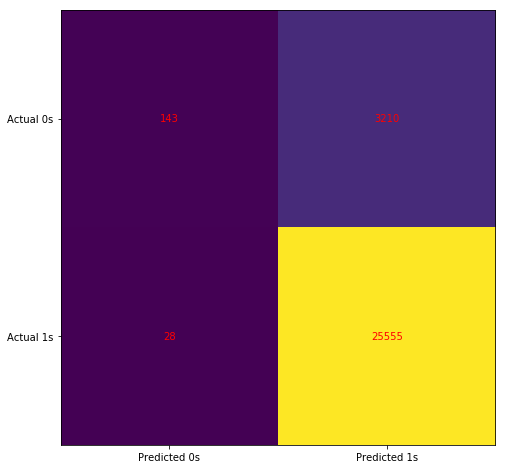

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_predict_test, lr.predict(x_feature_test)))
#Confusion Matrix
Confusion_matrix = confusion_matrix(y_predict_test, model.predict(x_feature_test))
print("Confusion Matrix: ")
print(Confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(Confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, Confusion_matrix[i, j], ha='center', va='center', color='red')
plt.show()
#Confusion Matrix: The confusion matrix shows how accurate the model was abel to predict values as compared to true values
#The upper left value shows that 3068 values are correctly predicted as 0's and lower value show 142 are not correctly predicted
#The bottom right values show that 25441 1 values are correctly predicted and upper right show 285 not correctly predicted
#Precision: Precision show the prediction accuracy for 0's were 96% and 99% for 1's
#Recall: Shows the ability of the model to predict positive class. Our model has 92% and 99% recall value. Precision and recall
#are vice-versa. If we increase precision, recall will decrease. 

##**Part 3: Objective function optimisation:**  **(6 marks)**

Let’s consider the line graphs shown below and answer the following questions [Hint: See weekly content 7.4-7.10],

<html>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(a)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(b)</html>

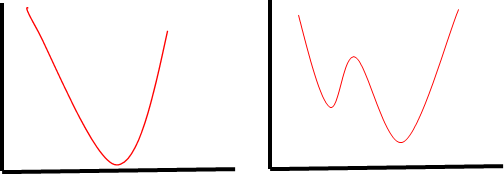





a.  Which of the above figures represents the convex objective function and why? (**1 marks**)

b.  Which hyper-parameter can help to reach the convergence point and the impact of value selection? (**2 marks**)

c.  How can we find the global minima for the objective function shown in Figure-b? _[N.B. Conceptual description will be accepted.]_ (**3 marks**)